In [1]:
#1.c
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002,betas=(0.5, 0.999))
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002,betas=(0.5, 0.999))

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:05, 23.24it/s]                                                        


Epoch 1 of 100
Generator loss: 0.85989271, Discriminator loss: 1.22293712


118it [00:04, 24.49it/s]                                                        


Epoch 2 of 100
Generator loss: 1.28527183, Discriminator loss: 0.90401507


118it [00:05, 23.05it/s]                                                        


Epoch 3 of 100
Generator loss: 2.29378324, Discriminator loss: 0.67330102


118it [00:05, 23.59it/s]                                                        


Epoch 4 of 100
Generator loss: 2.85115341, Discriminator loss: 0.60009343


118it [00:05, 23.35it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


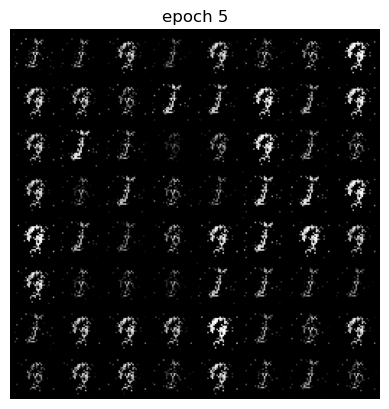

Epoch 5 of 100
Generator loss: 3.12656367, Discriminator loss: 0.65352708


118it [00:05, 23.52it/s]                                                        


Epoch 6 of 100
Generator loss: 3.09302497, Discriminator loss: 0.56507652


118it [00:05, 23.11it/s]                                                        


Epoch 7 of 100
Generator loss: 3.28826071, Discriminator loss: 0.64301996


118it [00:04, 24.31it/s]                                                        


Epoch 8 of 100
Generator loss: 2.81156636, Discriminator loss: 0.66161361


118it [00:05, 23.34it/s]                                                        


Epoch 9 of 100
Generator loss: 3.45156585, Discriminator loss: 0.56164751


118it [00:05, 22.27it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


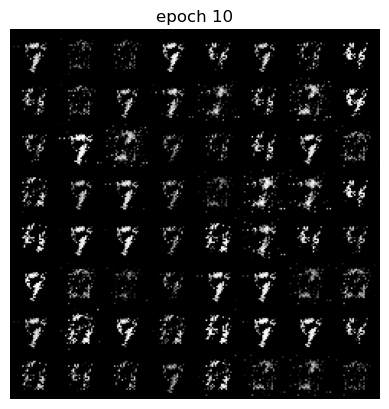

Epoch 10 of 100
Generator loss: 3.00757274, Discriminator loss: 0.56608145


118it [00:05, 22.97it/s]                                                        


Epoch 11 of 100
Generator loss: 3.13065738, Discriminator loss: 0.60886798


118it [00:04, 23.65it/s]                                                        


Epoch 12 of 100
Generator loss: 3.32357673, Discriminator loss: 0.54551763


118it [00:05, 22.13it/s]                                                        


Epoch 13 of 100
Generator loss: 3.04877508, Discriminator loss: 0.54501336


118it [00:04, 23.84it/s]                                                        


Epoch 14 of 100
Generator loss: 3.43368809, Discriminator loss: 0.50936442


118it [00:05, 22.70it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


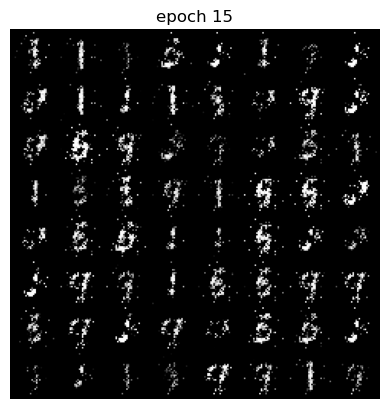

Epoch 15 of 100
Generator loss: 2.86733883, Discriminator loss: 0.56306558


118it [00:05, 22.40it/s]                                                        


Epoch 16 of 100
Generator loss: 2.76756117, Discriminator loss: 0.56785629


118it [00:05, 22.82it/s]                                                        


Epoch 17 of 100
Generator loss: 2.77431562, Discriminator loss: 0.47974622


118it [00:05, 23.45it/s]                                                        


Epoch 18 of 100
Generator loss: 3.04530977, Discriminator loss: 0.38046093


118it [00:05, 22.42it/s]                                                        


Epoch 19 of 100
Generator loss: 3.34517319, Discriminator loss: 0.31739062


118it [00:05, 23.15it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


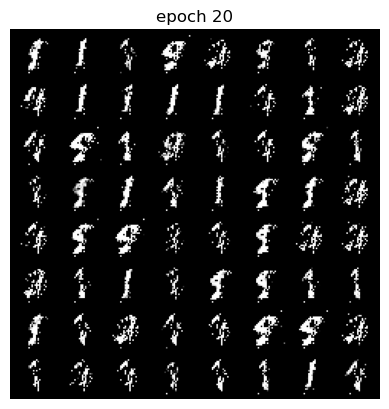

Epoch 20 of 100
Generator loss: 4.15697859, Discriminator loss: 0.25824475


118it [00:05, 20.15it/s]                                                        


Epoch 21 of 100
Generator loss: 3.32687731, Discriminator loss: 0.37917664


118it [00:05, 21.85it/s]                                                        


Epoch 22 of 100
Generator loss: 3.30503575, Discriminator loss: 0.31482840


118it [00:05, 23.06it/s]                                                        


Epoch 23 of 100
Generator loss: 3.40654667, Discriminator loss: 0.30360384


118it [00:05, 23.26it/s]                                                        


Epoch 24 of 100
Generator loss: 3.07970555, Discriminator loss: 0.34144455


118it [00:05, 22.79it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


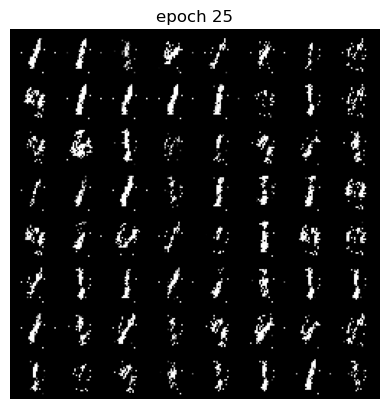

Epoch 25 of 100
Generator loss: 3.09023938, Discriminator loss: 0.36914966


118it [00:04, 24.75it/s]                                                        


Epoch 26 of 100
Generator loss: 3.02944564, Discriminator loss: 0.35863273


118it [00:04, 24.82it/s]                                                        


Epoch 27 of 100
Generator loss: 2.71300103, Discriminator loss: 0.42997384


118it [00:04, 25.24it/s]                                                        


Epoch 28 of 100
Generator loss: 2.79336724, Discriminator loss: 0.44961071


118it [00:04, 25.44it/s]                                                        


Epoch 29 of 100
Generator loss: 2.60289346, Discriminator loss: 0.47450337


118it [00:04, 25.14it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


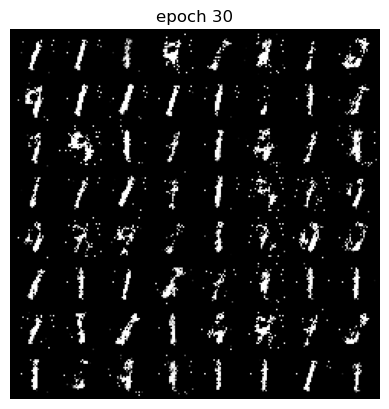

Epoch 30 of 100
Generator loss: 2.57513363, Discriminator loss: 0.46200257


118it [00:04, 25.08it/s]                                                        


Epoch 31 of 100
Generator loss: 2.50780708, Discriminator loss: 0.52415548


118it [00:04, 25.30it/s]                                                        


Epoch 32 of 100
Generator loss: 2.41993549, Discriminator loss: 0.57222026


118it [00:04, 25.16it/s]                                                        


Epoch 33 of 100
Generator loss: 2.27785494, Discriminator loss: 0.62227432


118it [00:04, 25.64it/s]                                                        


Epoch 34 of 100
Generator loss: 2.42085999, Discriminator loss: 0.61481851


118it [00:04, 25.15it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


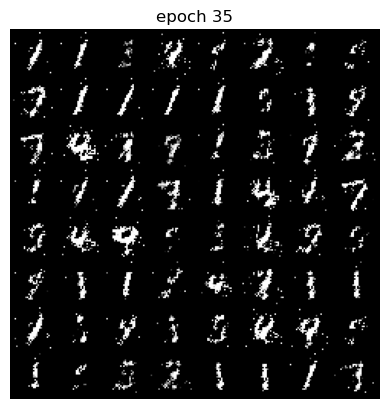

Epoch 35 of 100
Generator loss: 2.33271511, Discriminator loss: 0.58844232


118it [00:04, 25.28it/s]                                                        


Epoch 36 of 100
Generator loss: 2.28403416, Discriminator loss: 0.58954526


118it [00:04, 25.64it/s]                                                        


Epoch 37 of 100
Generator loss: 2.24797556, Discriminator loss: 0.62207067


118it [00:04, 25.20it/s]                                                        


Epoch 38 of 100
Generator loss: 2.08822205, Discriminator loss: 0.66948784


118it [00:04, 25.83it/s]                                                        


Epoch 39 of 100
Generator loss: 2.35185753, Discriminator loss: 0.62887697


118it [00:04, 25.65it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


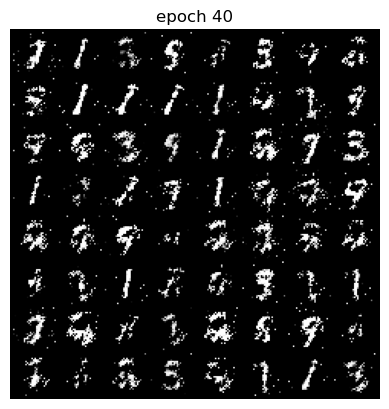

Epoch 40 of 100
Generator loss: 2.15820559, Discriminator loss: 0.74408405


118it [00:04, 25.76it/s]                                                        


Epoch 41 of 100
Generator loss: 1.82125577, Discriminator loss: 0.79432917


118it [00:04, 25.72it/s]                                                        


Epoch 42 of 100
Generator loss: 1.81589786, Discriminator loss: 0.81038126


118it [00:04, 25.48it/s]                                                        


Epoch 43 of 100
Generator loss: 1.79739932, Discriminator loss: 0.83757084


118it [00:04, 25.20it/s]                                                        


Epoch 44 of 100
Generator loss: 1.66689427, Discriminator loss: 0.87701152


118it [00:04, 24.39it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


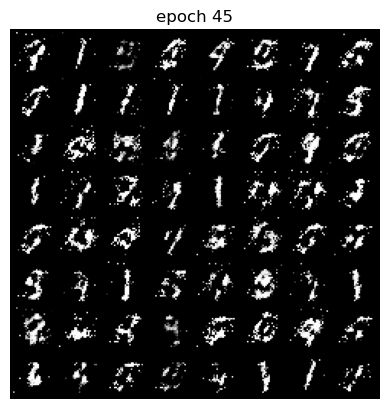

Epoch 45 of 100
Generator loss: 1.62223235, Discriminator loss: 0.88661937


118it [00:04, 24.76it/s]                                                        


Epoch 46 of 100
Generator loss: 1.63842728, Discriminator loss: 0.89609782


118it [00:04, 25.03it/s]                                                        


Epoch 47 of 100
Generator loss: 1.49539594, Discriminator loss: 0.94527679


118it [00:04, 24.88it/s]                                                        


Epoch 48 of 100
Generator loss: 1.46557954, Discriminator loss: 0.95492483


118it [00:05, 23.12it/s]                                                        


Epoch 49 of 100
Generator loss: 1.54170417, Discriminator loss: 0.92034863


118it [00:04, 24.96it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


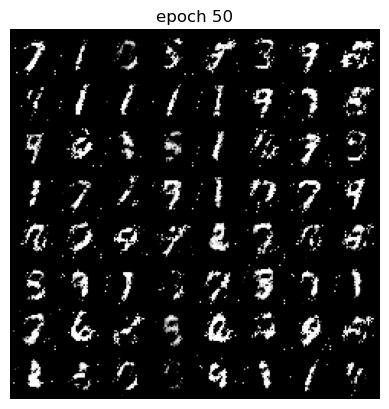

Epoch 50 of 100
Generator loss: 1.51752781, Discriminator loss: 0.90932253


118it [00:04, 24.77it/s]                                                        


Epoch 51 of 100
Generator loss: 1.49745294, Discriminator loss: 0.93120104


118it [00:04, 24.28it/s]                                                        


Epoch 52 of 100
Generator loss: 1.49556179, Discriminator loss: 0.93216850


118it [00:04, 24.99it/s]                                                        


Epoch 53 of 100
Generator loss: 1.45496755, Discriminator loss: 0.94776679


118it [00:05, 23.22it/s]                                                        


Epoch 54 of 100
Generator loss: 1.42693292, Discriminator loss: 0.98488279


118it [00:05, 22.25it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


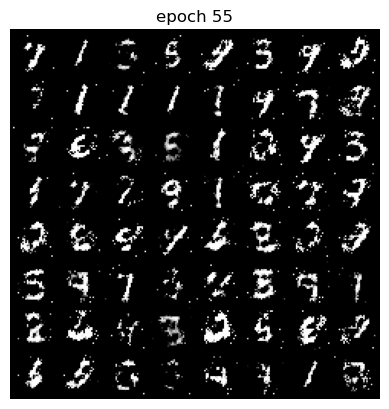

Epoch 55 of 100
Generator loss: 1.42300045, Discriminator loss: 0.96592708


118it [00:04, 23.67it/s]                                                        


Epoch 56 of 100
Generator loss: 1.44891623, Discriminator loss: 0.95918657


118it [00:05, 22.44it/s]                                                        


Epoch 57 of 100
Generator loss: 1.38874838, Discriminator loss: 0.99601677


118it [00:05, 22.72it/s]                                                        


Epoch 58 of 100
Generator loss: 1.40022850, Discriminator loss: 0.97729229


118it [00:05, 23.26it/s]                                                        


Epoch 59 of 100
Generator loss: 1.43570663, Discriminator loss: 0.97721485


118it [00:05, 22.37it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


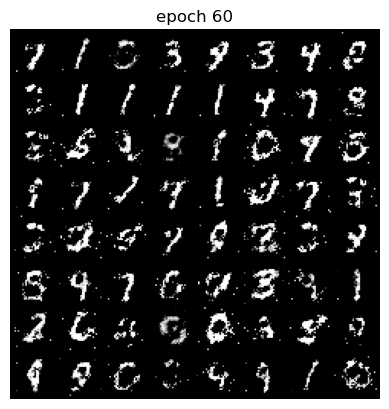

Epoch 60 of 100
Generator loss: 1.44492473, Discriminator loss: 0.96693985


118it [00:05, 21.91it/s]                                                        


Epoch 61 of 100
Generator loss: 1.36382387, Discriminator loss: 0.99535403


118it [00:04, 24.57it/s]                                                        


Epoch 62 of 100
Generator loss: 1.40231900, Discriminator loss: 0.97942211


118it [00:05, 23.29it/s]                                                        


Epoch 63 of 100
Generator loss: 1.40046684, Discriminator loss: 0.97547452


118it [00:05, 22.47it/s]                                                        


Epoch 64 of 100
Generator loss: 1.43313699, Discriminator loss: 0.97042380


118it [00:05, 22.36it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


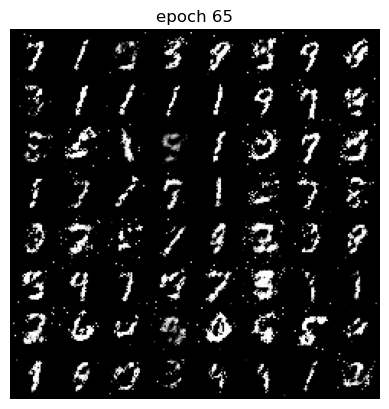

Epoch 65 of 100
Generator loss: 1.39793729, Discriminator loss: 0.98589104


118it [00:05, 21.81it/s]                                                        


Epoch 66 of 100
Generator loss: 1.43120794, Discriminator loss: 0.97655005


118it [00:05, 22.02it/s]                                                        


Epoch 67 of 100
Generator loss: 1.35648763, Discriminator loss: 0.99653443


118it [00:05, 22.25it/s]                                                        


Epoch 68 of 100
Generator loss: 1.38388340, Discriminator loss: 0.98358831


118it [00:05, 22.81it/s]                                                        


Epoch 69 of 100
Generator loss: 1.38389705, Discriminator loss: 0.98607484


118it [00:04, 25.98it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


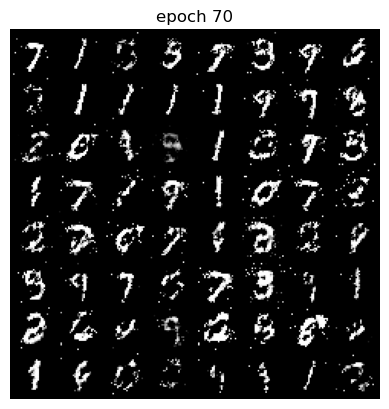

Epoch 70 of 100
Generator loss: 1.40969458, Discriminator loss: 0.98055200


118it [00:04, 26.11it/s]                                                        


Epoch 71 of 100
Generator loss: 1.36162566, Discriminator loss: 0.99850497


118it [00:04, 25.15it/s]                                                        


Epoch 72 of 100
Generator loss: 1.34193631, Discriminator loss: 1.01375104


118it [00:04, 28.40it/s]                                                        


Epoch 73 of 100
Generator loss: 1.39337283, Discriminator loss: 1.00251204


118it [00:04, 27.20it/s]                                                        


Epoch 74 of 100
Generator loss: 1.32699029, Discriminator loss: 1.02415982


118it [00:05, 23.10it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


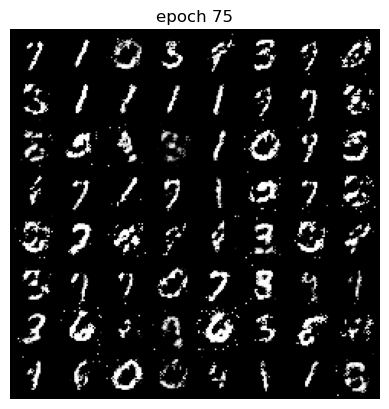

Epoch 75 of 100
Generator loss: 1.32910249, Discriminator loss: 1.03873799


118it [00:04, 27.37it/s]                                                        


Epoch 76 of 100
Generator loss: 1.29228373, Discriminator loss: 1.03551845


118it [00:04, 25.74it/s]                                                        


Epoch 77 of 100
Generator loss: 1.30265316, Discriminator loss: 1.04033783


118it [00:04, 27.24it/s]                                                        


Epoch 78 of 100
Generator loss: 1.31797369, Discriminator loss: 1.02836594


118it [00:04, 27.57it/s]                                                        


Epoch 79 of 100
Generator loss: 1.32364518, Discriminator loss: 1.03041966


118it [00:04, 26.18it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


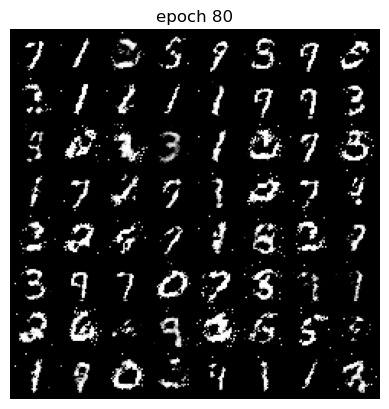

Epoch 80 of 100
Generator loss: 1.31108565, Discriminator loss: 1.02996130


118it [00:04, 27.02it/s]                                                        


Epoch 81 of 100
Generator loss: 1.28472761, Discriminator loss: 1.05036105


118it [00:04, 28.92it/s]                                                        


Epoch 82 of 100
Generator loss: 1.30556279, Discriminator loss: 1.03968080


118it [00:04, 28.32it/s]                                                        


Epoch 83 of 100
Generator loss: 1.31948290, Discriminator loss: 1.03046082


118it [00:04, 29.37it/s]                                                        


Epoch 84 of 100
Generator loss: 1.29504272, Discriminator loss: 1.04992009


118it [00:04, 28.95it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


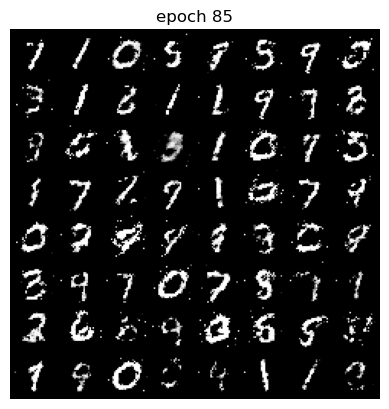

Epoch 85 of 100
Generator loss: 1.28456946, Discriminator loss: 1.04826721


118it [00:04, 28.76it/s]                                                        


Epoch 86 of 100
Generator loss: 1.26181962, Discriminator loss: 1.04798959


118it [00:04, 29.26it/s]                                                        


Epoch 87 of 100
Generator loss: 1.26608893, Discriminator loss: 1.05811044


118it [00:04, 29.16it/s]                                                        


Epoch 88 of 100
Generator loss: 1.25664999, Discriminator loss: 1.04323047


118it [00:04, 28.99it/s]                                                        


Epoch 89 of 100
Generator loss: 1.28039127, Discriminator loss: 1.05727804


118it [00:03, 29.50it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


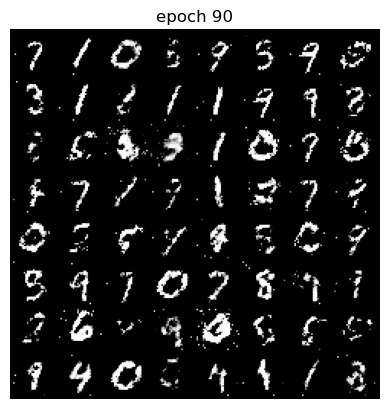

Epoch 90 of 100
Generator loss: 1.29001142, Discriminator loss: 1.04785222


118it [00:04, 29.38it/s]                                                        


Epoch 91 of 100
Generator loss: 1.25793050, Discriminator loss: 1.05644567


118it [00:04, 27.74it/s]                                                        


Epoch 92 of 100
Generator loss: 1.24788523, Discriminator loss: 1.06459174


118it [00:04, 27.98it/s]                                                        


Epoch 93 of 100
Generator loss: 1.24244382, Discriminator loss: 1.06563490


118it [00:04, 28.57it/s]                                                        


Epoch 94 of 100
Generator loss: 1.26541324, Discriminator loss: 1.06414432


118it [00:04, 28.61it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


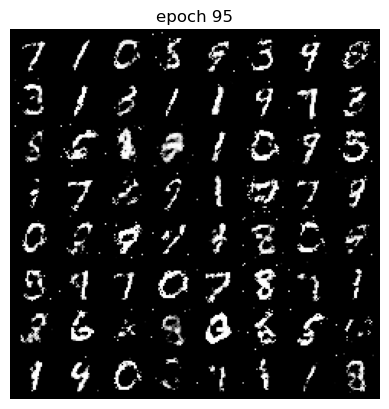

Epoch 95 of 100
Generator loss: 1.25279966, Discriminator loss: 1.04756475


118it [00:04, 28.70it/s]                                                        


Epoch 96 of 100
Generator loss: 1.27224916, Discriminator loss: 1.07302803


118it [00:04, 28.13it/s]                                                        


Epoch 97 of 100
Generator loss: 1.25253456, Discriminator loss: 1.06845178


118it [00:04, 28.87it/s]                                                        


Epoch 98 of 100
Generator loss: 1.23621853, Discriminator loss: 1.06404526


118it [00:04, 28.35it/s]                                                        


Epoch 99 of 100
Generator loss: 1.24251770, Discriminator loss: 1.06927740


118it [00:04, 27.72it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


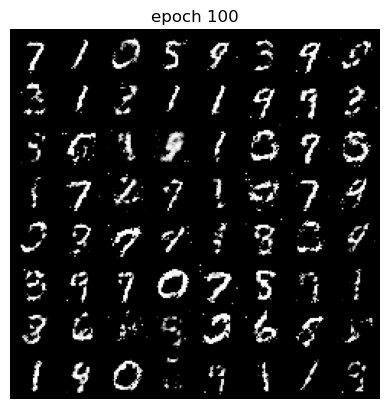

Epoch 100 of 100
Generator loss: 1.20963098, Discriminator loss: 1.08502956


In [14]:
torch.manual_seed(7)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    optim_g.zero_grad()
    batch =  output.shape[0]
    
    z = create_noise(batch, 128)
    labelz = label_real(batch)
    xfake = generator(z)
    outz = discriminator(xfake)
    lossz = criterion(outz, labelz)

    Gloss = lossz
    Gloss.backward()
    optim_g.step()

    return  Gloss.data.item()
    
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    optim_d.zero_grad()
    batch =  output.shape[0]
    
    labelx = label_real(batch)
    
    outx = discriminator(output)
    lossx = criterion(outx, labelx)

    z = create_noise(batch, 128)
    labelz = label_fake(batch)
    
    xfake = generator(z)
    outz = discriminator(xfake)
    lossz = criterion(outz, labelz)

    Dloss = lossx + lossz

    Dloss.backward()
    optim_d.step()

    return  Dloss.data.item()
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        for _ in range(k):
            data_ = data[0][torch.randperm(data[0].size()[0])]
            data_ = data_[:sample_size, :, :, :]
            loss_d += discriminator_loss(data_, None)
        loss_g += generator_loss(data_, None)
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"output_new/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [18]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'output_new/generator.pth')

DONE TRAINING


In [19]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('output_new/generator_images.gif', imgs)

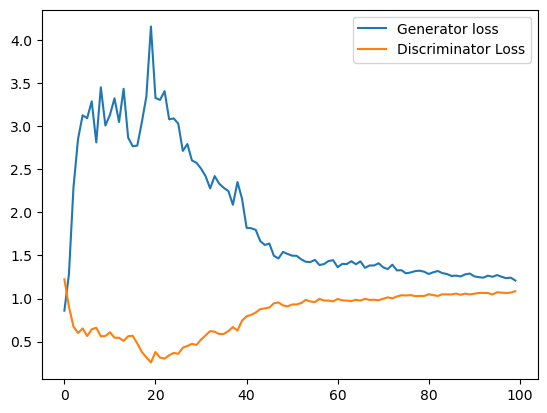

In [20]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('output_new/loss.png')